In [6]:
import pyopenms
from pyopenms import *
print ("Avogadro's number is", pyopenms.Constants.AVOGADRO)

edb = ElementDB()
edb.hasElement("O")
oxygen = edb.getElement("O")

Avogadro's number is 6.0221367e+23


In [7]:
print(oxygen.getName())
print(oxygen.getSymbol())
print(oxygen.getMonoWeight())
print(oxygen.getAverageWeight())
print ("One mole of oxygen weighs", 2*oxygen.getAverageWeight(), "grams")

Oxygen
O
15.994915
15.999405323160001
One mole of oxygen weighs 31.998810646320003 grams


In [8]:
sulfur = edb.getElement("S")
print(sulfur.getName())
print(sulfur.getSymbol())
print(sulfur.getMonoWeight())
print(sulfur.getAverageWeight())
isotopes = sulfur.getIsotopeDistribution()
print ("One mole of 16O2 weighs", 2*oxygen.getMonoWeight(), "grams")

Sulfur
S
31.97207073
32.066084735289
One mole of 16O2 weighs 31.98983 grams


In [9]:
edb = ElementDB()


oxygen_isoDist = {"mass": [], "abundance": []}

oxygen = edb.getElement("O")


isotopes = oxygen.getIsotopeDistribution()


for iso in isotopes.getContainer():
    print ("Oxygen isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    oxygen_isoDist["mass"].append(iso.getMZ())
    oxygen_isoDist["abundance"].append((iso.getIntensity() * 100))

Oxygen isotope 15.994915 has abundance 99.75699782371521 %
Oxygen isotope 16.999132 has abundance 0.03800000122282654 %
Oxygen isotope 17.999169 has abundance 0.20500000100582838 %


In [10]:
sulfur_isoDist = {"mass": [], "abundance": []}


sulfur = edb.getElement("S")


isotopes = sulfur.getIsotopeDistribution()


for iso in isotopes.getContainer():
    print ("Sulfur isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    sulfur_isoDist["mass"].append(iso.getMZ())
    sulfur_isoDist["abundance"].append((iso.getIntensity() * 100))

Sulfur isotope 31.97207073 has abundance 94.92999911308289 %
Sulfur isotope 32.971458 has abundance 0.7600000128149986 %
Sulfur isotope 33.967867 has abundance 4.2899999767541885 %
Sulfur isotope 35.967081 has abundance 0.019999999494757503 %


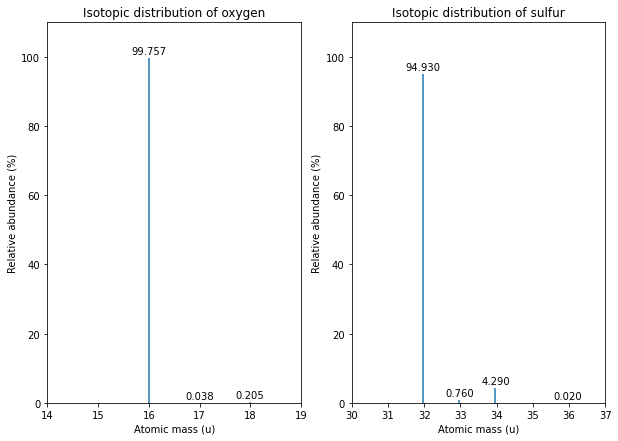

In [11]:
import math
from matplotlib import pyplot as plt

def adjustText(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate('%0.3f' % (y2), xy=(x2, y2), xytext=(x2+0.5,y2+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')
    else:
        plt.annotate('%0.3f' % (y1), xy=(x1, y1), xytext=(x1+0.5,y1+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')


def plotDistribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i])
        if int(distribution["mass"][i - 1]) == int(distribution["mass"][i]) \
                and i != 0:
            adjustText(distribution["mass"][i - 1], distribution["abundance"][i - 1],
                       distribution["mass"][i], distribution["abundance"][i])
        else:
            plt.text(x=distribution["mass"][i],
                     y=(distribution["abundance"][i] + 2),
                     s='%0.3f' % (distribution["abundance"][i]), va='center',
                     ha='center')
    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))


plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Isotopic distribution of oxygen")
plotDistribution(oxygen_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,2,2)
plt.title("Isotopic distribution of sulfur")
plotDistribution(sulfur_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

In [12]:
edb = ElementDB()

isotopes = edb.getElement("C").getIsotopeDistribution().getContainer()

carbon_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()

isotopes = edb.getElement("N").getIsotopeDistribution().getContainer()

nitrogen_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()
print ("Mass difference between 12C and 13C:", carbon_isotope_difference)
print ("Mass difference between 14N and N15:", nitrogen_isotope_difference)
print ("Relative deviation:", 100*(carbon_isotope_difference -nitrogen_isotope_difference)/carbon_isotope_difference, "%")

Mass difference between 12C and 13C: 1.0033550000000009
Mass difference between 14N and N15: 0.9970350000000003
Relative deviation: 0.6298867300208343 %


In [13]:
methanol = EmpiricalFormula("CH3OH")
water = EmpiricalFormula("H2O")
ethanol = EmpiricalFormula("CH2") + methanol
print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol has", ethanol.getElementalComposition()[b"H"], "hydrogen atoms")


Ethanol chemical formula: C2H6O1
Ethanol composition: {b'C': 2, b'H': 6, b'O': 1}
Ethanol has 6 hydrogen atoms


In [14]:
lys = ResidueDB().getResidue("Lysine")
print(lys.getName())
print(lys.getThreeLetterCode())
print(lys.getOneLetterCode())
print(lys.getAverageWeight())
print(lys.getMonoWeight())
print(lys.getPka())
print(lys.getFormula().toString())

Lysine
Lys
K
146.18788276708443
146.1055284466
2.16
C6H14N2O2


In [15]:
ox = ModificationsDB().getModification("Oxidation")

print(ox.getUniModAccession())
print(ox.getUniModRecordId())
print(ox.getDiffMonoMass())
print(ox.getId())
print(ox.getFullId())
print(ox.getFullName())
print(ox.getDiffFormula())

UniMod:35
35
15.994915
Oxidation
Oxidation (P)
Oxidation or Hydroxylation
O1


In [16]:
isotopes = ox.getDiffFormula().getIsotopeDistribution(CoarseIsotopePatternGenerator(5))
for iso in isotopes.getContainer():
    print (iso.getMZ(), ":", iso.getIntensity())
    
    uridine = RibonucleotideDB().getRibonucleotide(b"U")

print(uridine.getName())
print(uridine.getCode())
print(uridine.getAvgMass())
print(uridine.getMonoMass())
print(uridine.getFormula().toString())
print(uridine.isModified())
methyladenosine = RibonucleotideDB().getRibonucleotide(b"m1A")
print(methyladenosine.getName())
print(methyladenosine.isModified())

15.994915 : 0.9975699782371521
16.998269837800002 : 0.0003800000122282654
18.0016246756 : 0.002050000010058284
uridine
U
244.2043
244.0695
C9H12N2O6
False
1-methyladenosine
True
